In [1]:
__file__ = 'erosion_and_dilation.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP7_lib")

import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

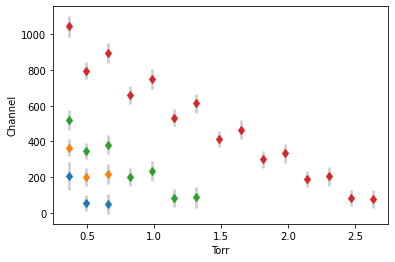

In [13]:
with open("Results/center.txt") as tf:
    data = np.genfromtxt(tf,delimiter="\t",skip_header=1).T
    
#Torr = data[0]
Torr = data[0]/760*5
m1 = data[1]
m2 = data[3]
m3 = data[5]
m4 = data[7]
e1 = data[2]
e2 = data[4]
e3 = data[6]
e4 = data[8]

plt.errorbar(Torr,m1,yerr=e1,fmt='d',ecolor='lightgray', elinewidth=3, capsize=0)
plt.errorbar(Torr,m2,yerr=e2,fmt='d',ecolor='lightgray', elinewidth=3, capsize=0)
plt.errorbar(Torr,m3,yerr=e3,fmt='d',ecolor='lightgray', elinewidth=3, capsize=0)
plt.errorbar(Torr,m4,yerr=e4,fmt='d',ecolor='lightgray', elinewidth=3, capsize=0)

plt.ylabel("Channel")
plt.xlabel("Torr")
plt.show()

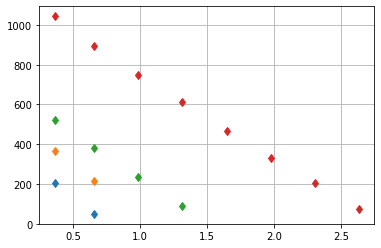

In [22]:

torrnew = []
m1new = []
m2new = []
m3new = []
m4new = []


for i in range(len(m1)):
    if i%2 != 1:
        torrnew.append(Torr[i])
        m1new.append(m1[i])
        m2new.append(m2[i])
        m3new.append(m3[i])
        m4new.append(m4[i])

plt.errorbar(torrnew,m1new,fmt='d')
plt.errorbar(torrnew,m2new,fmt='d')
plt.errorbar(torrnew,m3new,fmt='d')
plt.errorbar(torrnew,m4new,fmt='d')

plt.grid()
plt.show()

slope:      294.320493 +/- 13.8967443 (4.72%) (init = 295.0317)  
intercept: -1227.52279 +/- 82.7468931 (6.74%) (init = -1232.33)